<a href="https://colab.research.google.com/github/jeetshah0303/Artificialintelligence/blob/main/PadLAB6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#anomaly detection using k means clustering


In [ ]:
#generating the data to detect anomaly 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [3]:
data=np.array([[1,1],[2,2],[2,3],[8,7],[8,9],[7,9],[7,7],[12,10],[25,24],[24,24],[25,20],[20,25],[25,25]])

In [4]:
data

array([[ 1,  1],
       [ 2,  2],
       [ 2,  3],
       [ 8,  7],
       [ 8,  9],
       [ 7,  9],
       [ 7,  7],
       [12, 10],
       [25, 24],
       [24, 24],
       [25, 20],
       [20, 25],
       [25, 25]])

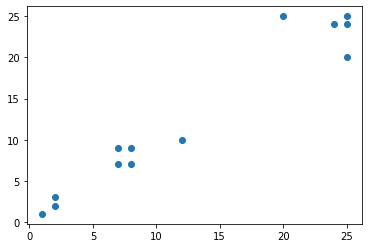

In [5]:
plt.scatter(data[:,0],data[:,1])

In [6]:
#k-means model with k=3
km = KMeans(n_clusters=3) 
clusters=km.fit_predict(data)

In [7]:
clusters=km.predict(data)


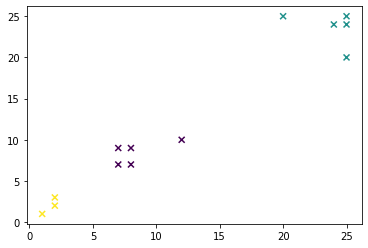

In [8]:
plt.scatter(*zip(*data),c=clusters,marker='x')

In [9]:
#obtain the centers of the clusters 
centroid=km.cluster_centers_

In [10]:
centroid

array([[ 8.4       ,  8.4       ],
       [23.8       , 23.6       ],
       [ 1.66666667,  2.        ]])

In [11]:
#initialise a array which will be used to reach the index
points = np.empty((0,len(data[0])),float)

In [12]:
points.shape

(0, 2)

In [13]:
#initialize an array which will be used to calculate outlier distance 
distances=np.empty((0,len(data[0])),float)

In [14]:
distances.shape

(0, 2)

In [16]:
for i, center_elem in enumerate(centroid):
  distances=np.append(distances,cdist([center_elem],data[clusters==i],'euclidean'))
  points=np.append(points,data[clusters==i],axis=0)

In [17]:
distances

array([1.45602198, 0.72111026, 1.52315462, 1.97989899, 3.93954312,
       1.26491106, 0.4472136 , 3.79473319, 4.04969135, 1.84390889,
       1.20185043, 0.33333333, 1.05409255])

In [18]:
points

array([[ 8.,  7.],
       [ 8.,  9.],
       [ 7.,  9.],
       [ 7.,  7.],
       [12., 10.],
       [25., 24.],
       [24., 24.],
       [25., 20.],
       [20., 25.],
       [25., 25.],
       [ 1.,  1.],
       [ 2.,  2.],
       [ 2.,  3.]])

In [19]:
threshold =80

In [20]:
outliers=points[np.where(distances>np.percentile(distances,threshold))]

In [21]:
outliers

array([[12., 10.],
       [25., 20.],
       [20., 25.]])

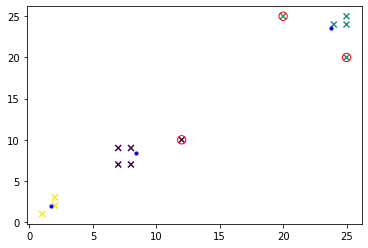

In [24]:
plt.scatter(*zip(*data),c=clusters,marker='x')
plt.scatter(*zip(*outliers),marker='o',facecolor='None',edgecolors='r',s=70)
plt.scatter(*zip(*centroid),marker='o',facecolor='b',edgecolors='b',s=10)

In [25]:
#similarly w k=1
km = KMeans(n_clusters=1) 
clusters=km.fit_predict(data)

In [26]:
clusters=km.predict(data)

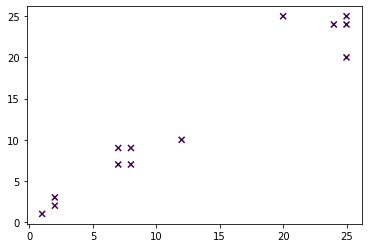

In [27]:
plt.scatter(*zip(*data),c=clusters,marker='x')

In [28]:
#obtain the centers of the clusters 
centroid=km.cluster_centers_

In [29]:
#initialise a array which will be used to reach the index
points = np.empty((0,len(data[0])),float)

In [30]:
#initialize an array which will be used to calculate outlier distance 
distances=np.empty((0,len(data[0])),float)

In [31]:
for i, center_elem in enumerate(centroid):
  distances=np.append(distances,cdist([center_elem],data[clusters==i],'euclidean'))
  points=np.append(points,data[clusters==i],axis=0)

In [32]:
outliers=points[np.where(distances>np.percentile(distances,threshold))]

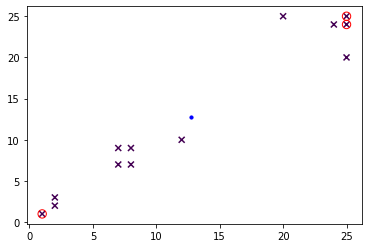

In [33]:
plt.scatter(*zip(*data),c=clusters,marker='x')
plt.scatter(*zip(*outliers),marker='o',facecolor='None',edgecolors='r',s=70)
plt.scatter(*zip(*centroid),marker='o',facecolor='b',edgecolors='b',s=10)